In [1]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from random import randint

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
from nltk.corpus import stopwords
#nltk.download('stopwords')
#stopwords.words('english')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
industrial_safety_df = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
industrial_safety_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,01-01-2016 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,02-01-2016 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,06-01-2016 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,08-01-2016 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [4]:
industrial_safety_df.shape

(425, 11)

### Grouping by Accident Level and Potential Accident Level 

In [5]:
group_acc_level = industrial_safety_df.groupby(['Accident Level'])
group_acc_level.first()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
Accident Level,,,,,,,,,,
I,0,01-01-2016 00:00,Country_01,Local_01,Mining,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
II,22,10-02-2016 00:00,Country_01,Local_03,Mining,IV,Male,Third Party,Others,While aligning the right bracket of tower N ° ...
III,16,06-02-2016 00:00,Country_01,Local_04,Mining,IV,Male,Third Party,Others,"At Rp 050 of level 1620, in circumstances wher..."
IV,4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
V,33,20-02-2016 00:00,Country_01,Local_04,Mining,V,Male,Third Party,Others,Approximately 1:40 p.m. in circumstances that ...


In [6]:
group_ptnl_acc_level = industrial_safety_df.groupby(['Potential Accident Level'])
group_ptnl_acc_level.first()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Genre,Employee or Third Party,Critical Risk,Description
Potential Accident Level,,,,,,,,,,
I,3,08-01-2016 00:00,Country_01,Local_04,Mining,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
II,9,26-01-2016 00:00,Country_01,Local_06,Metals,I,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...
III,2,06-01-2016 00:00,Country_01,Local_03,Mining,I,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
IV,0,01-01-2016 00:00,Country_01,Local_01,Mining,I,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
V,13,02-02-2016 00:00,Country_01,Local_01,Mining,IV,Male,Third Party,Electrical installation,"In moments that the operator of the Jumbo 2, t..."
VI,321,25-01-2017 00:00,Country_01,Local_03,Mining,V,Male,Third Party,remains of choco,During the process of loading drills in the Ca...


### DataSet Analysis- Basic EDA

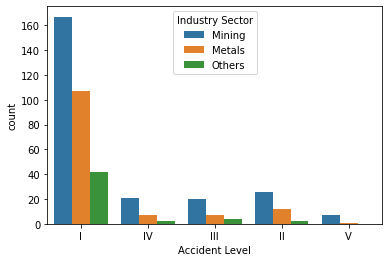

In [7]:
sns.countplot(x ='Accident Level', data = industrial_safety_df, hue ='Industry Sector'); 

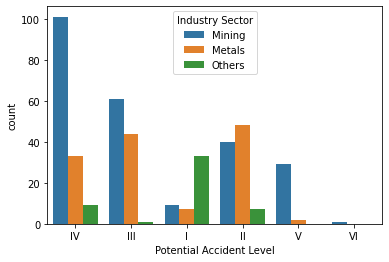

In [8]:
sns.countplot(x ='Potential Accident Level', data = industrial_safety_df, hue ='Industry Sector'); 

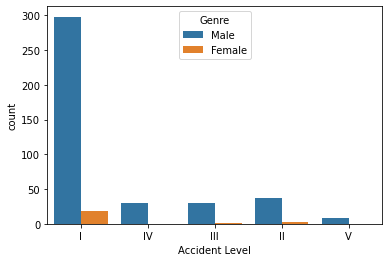

In [9]:
sns.countplot(x ='Accident Level', data = industrial_safety_df, hue ='Genre'); 

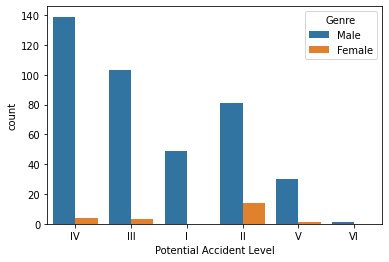

In [10]:
sns.countplot(x ='Potential Accident Level', data = industrial_safety_df, hue ='Genre'); 

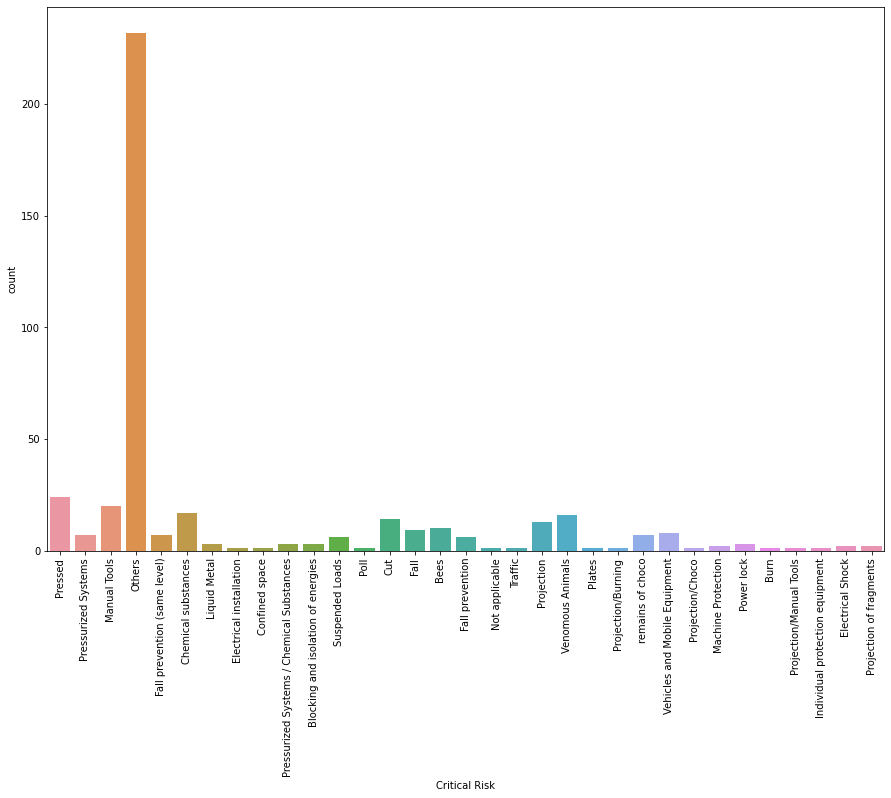

In [11]:
plt.figure(figsize=(15,10))
plt.setp(sns.countplot(industrial_safety_df['Critical Risk']).get_xticklabels(), rotation=90);

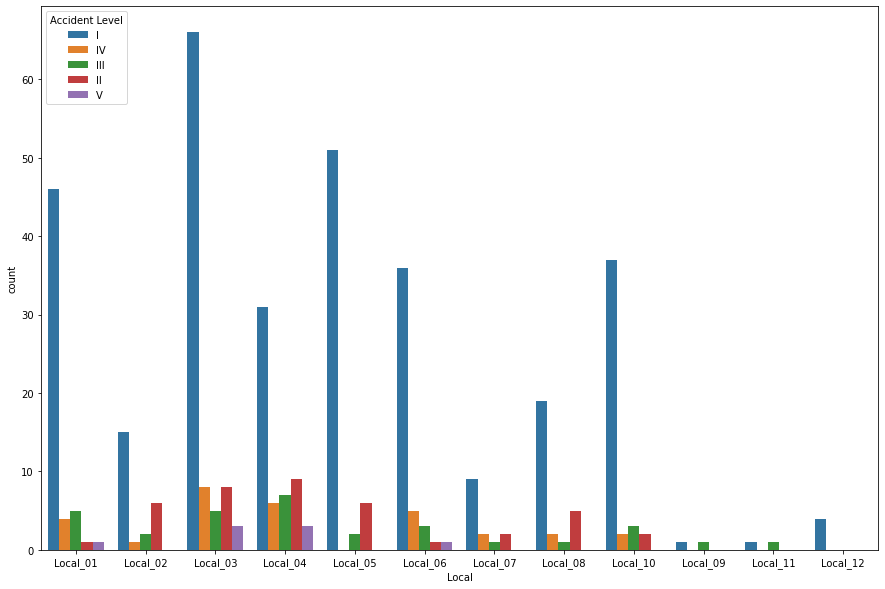

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(industrial_safety_df['Local'], hue = industrial_safety_df['Accident Level']);

 - #### Labeling The Dataset
 > As per the dataset there are 1-6 level of Accident Level, here we have labeled 1-2 as low risk, 3-4 moderate risk and 5-6 critical risk 

In [13]:
def create_label(accident_level):
    level = str(accident_level)
    if level.__eq__("I") or level.__eq__("II"):
        return "low"
    if level.__eq__("III"):
        return "moderate"
    if level.__eq__("IV") or level.__eq__("V"):
        return "high"
    if level.__eq__("VI"):
        return "critical"
    
industrial_safety_df['Accident Severity'] = industrial_safety_df['Accident Level'].apply(create_label)
industrial_safety_df[['Accident Level','Accident Severity']]

,Accident Level,Accident Severity
0,I,low
1,I,low
2,I,low
3,I,low
4,IV,high
...,...,...
420,I,low
421,I,low
422,I,low
423,I,low


#### We can see that the Mining Sector is the most risky as the most number of accidents recorded in that sector followed by Metals

### Data Cleansing
 

In [14]:
#Renaming Data -> date, Genre -> Gender
#Removing the Column Unnamed as it's just sequence

industrial_safety_df.rename(columns = {'Data': 'Date', 'Genre': 'Gender'}, inplace = True)
industrial_safety_df = industrial_safety_df.drop("Unnamed: 0",axis=1)
industrial_safety_df.head()


,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Accident Severity
0,01-01-2016 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,low
1,02-01-2016 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,low
2,06-01-2016 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,low
3,08-01-2016 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,low
4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,high


In [15]:
industrial_safety_df.describe()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Accident Severity
count,425,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411,3
top,08-02-2017 00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,On 02/03/17 during the soil sampling in the re...,low
freq,6,251,90,241,316,143,403,189,232,3,356


In [16]:
industrial_safety_df.isnull().sum()

Date                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
Accident Severity           0
dtype: int64

In [17]:
industrial_safety_df.dtypes

Date                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Gender                      object
Employee or Third Party     object
Critical Risk               object
Description                 object
Accident Severity           object
dtype: object

### Pre-Processing the Text 

- #### Removing all irrelevant characters (Numbers and Punctuation)

In [18]:
def remove_alpha_numerics(description_txt):
    return re.sub('[^a-zA-Z]',' ',description_txt)
industrial_safety_df['Updated Description'] = industrial_safety_df['Description'].apply(remove_alpha_numerics)
industrial_safety_df['Updated Description']

0      While removing the drill rod of the Jumbo    f...
1      During the activation of a sodium sulphide pum...
2      In the sub station MILPO located at level     ...
3      Being      am  approximately in the Nv       C...
4      Approximately at       a m  in circumstances t...
                             ...                        
420    Being approximately      a m  approximately  w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At       a m   when the assistant cleaned the ...
Name: Updated Description, Length: 425, dtype: object

- #### Convert all characters into lowercase

In [19]:
def to_lower_case(description_txt):
    return str(description_txt).lower()
industrial_safety_df['Updated Description'] = industrial_safety_df['Updated Description'].apply(to_lower_case)
industrial_safety_df['Updated Description']

0      while removing the drill rod of the jumbo    f...
1      during the activation of a sodium sulphide pum...
2      in the sub station milpo located at level     ...
3      being      am  approximately in the nv       c...
4      approximately at       a m  in circumstances t...
                             ...                        
420    being approximately      a m  approximately  w...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at       a m   when the assistant cleaned the ...
Name: Updated Description, Length: 425, dtype: object

- #### Tokenization 

In [20]:
industrial_safety_df['Updated Description'] = industrial_safety_df.apply(lambda word: nltk.word_tokenize(word['Updated Description']), axis=1)
industrial_safety_df['Updated Description']

0      [while, removing, the, drill, rod, of, the, ju...
1      [during, the, activation, of, a, sodium, sulph...
2      [in, the, sub, station, milpo, located, at, le...
3      [being, am, approximately, in, the, nv, cx, ob...
4      [approximately, at, a, m, in, circumstances, t...
                             ...                        
420    [being, approximately, a, m, approximately, wh...
421    [the, collaborator, moved, from, the, infrastr...
422    [during, the, environmental, monitoring, activ...
423    [the, employee, performed, the, activity, of, ...
424    [at, a, m, when, the, assistant, cleaned, the,...
Name: Updated Description, Length: 425, dtype: object

- #### Removing Stopwords

In [21]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(word):
    return [token for token in word if not token in stop_words]
    
industrial_safety_df['Updated Description'] = industrial_safety_df['Updated Description'].apply(remove_stopwords)
industrial_safety_df['Updated Description']

0      [removing, drill, rod, jumbo, maintenance, sup...
1      [activation, sodium, sulphide, pump, piping, u...
2      [sub, station, milpo, located, level, collabor...
3      [approximately, nv, cx, ob, personnel, begins,...
4      [approximately, circumstances, mechanics, anth...
                             ...                        
420    [approximately, approximately, lifting, kelly,...
421    [collaborator, moved, infrastructure, office, ...
422    [environmental, monitoring, activity, area, em...
423    [employee, performed, activity, stripping, cat...
424    [assistant, cleaned, floor, module, e, central...
Name: Updated Description, Length: 425, dtype: object

- #### Stemming

In [22]:
stemmer = PorterStemmer()
def stem_tokens(tokens):
    return [stemmer.stem(index) for index in tokens]
industrial_safety_df['Updated Description Stems'] = industrial_safety_df['Updated Description'].apply(stem_tokens)
industrial_safety_df['Updated Description Stems']

0      [remov, drill, rod, jumbo, mainten, supervisor...
1      [activ, sodium, sulphid, pump, pipe, uncoupl, ...
2      [sub, station, milpo, locat, level, collabor, ...
3      [approxim, nv, cx, ob, personnel, begin, task,...
4      [approxim, circumst, mechan, anthoni, group, l...
                             ...                        
420    [approxim, approxim, lift, kelli, hq, toward, ...
421    [collabor, move, infrastructur, offic, julio, ...
422    [environment, monitor, activ, area, employe, s...
423    [employe, perform, activ, strip, cathod, pull,...
424    [assist, clean, floor, modul, e, central, camp...
Name: Updated Description Stems, Length: 425, dtype: object

#### As we can see due to stemming changed some of the words incorrectly, so we will do Lemmatization and compare

- #### Lemmatization

In [23]:
#nltk.download('wordnet')
lemma = WordNetLemmatizer()
def lematize_tokens(tokens):
    return [lemma.lemmatize(word=w,pos='v') for w in tokens]
industrial_safety_df['Updated Description Lemmas'] = industrial_safety_df['Updated Description'].apply(lematize_tokens)
industrial_safety_df['Updated Description Lemmas']

0      [remove, drill, rod, jumbo, maintenance, super...
1      [activation, sodium, sulphide, pump, pip, unco...
2      [sub, station, milpo, locate, level, collabora...
3      [approximately, nv, cx, ob, personnel, begin, ...
4      [approximately, circumstances, mechanics, anth...
                             ...                        
420    [approximately, approximately, lift, kelly, hq...
421    [collaborator, move, infrastructure, office, j...
422    [environmental, monitor, activity, area, emplo...
423    [employee, perform, activity, strip, cathodes,...
424    [assistant, clean, floor, module, e, central, ...
Name: Updated Description Lemmas, Length: 425, dtype: object

- #### As we can see Lemmatization performed much better than the stemming so we will preffer lemmatization here 

#### Remove the words having length <= 2

In [24]:
# still few nonsense words exist in the lemmatized tokens
# we are going to remove those as they can be noise to the data
def remove_noise(tokens):
    return [i for i in tokens if len(i) > 2]
industrial_safety_df['Updated Description Lemmas'] = industrial_safety_df['Updated Description Lemmas'].apply(remove_noise)
industrial_safety_df['Updated Description Lemmas']

0      [remove, drill, rod, jumbo, maintenance, super...
1      [activation, sodium, sulphide, pump, pip, unco...
2      [sub, station, milpo, locate, level, collabora...
3      [approximately, personnel, begin, task, unlock...
4      [approximately, circumstances, mechanics, anth...
                             ...                        
420    [approximately, approximately, lift, kelly, to...
421    [collaborator, move, infrastructure, office, j...
422    [environmental, monitor, activity, area, emplo...
423    [employee, perform, activity, strip, cathodes,...
424    [assistant, clean, floor, module, central, cam...
Name: Updated Description Lemmas, Length: 425, dtype: object

- So this is the required corpus after text preprocessing. 
- now we will convert back this list to string for encoding the text.

### Final Text Data After Preprocessing

In [25]:
#Convert the list of tokens into back to the string
def to_string(tokens):
    return ' '.join(tokens)
industrial_safety_df['Updated Description'] = industrial_safety_df['Updated Description Lemmas'].apply(to_string)
industrial_safety_df['Updated Description']

0      remove drill rod jumbo maintenance supervisor ...
1      activation sodium sulphide pump pip uncouple s...
2      sub station milpo locate level collaborator ex...
3      approximately personnel begin task unlock soqu...
4      approximately circumstances mechanics anthony ...
                             ...                        
420    approximately approximately lift kelly towards...
421    collaborator move infrastructure office julio ...
422    environmental monitor activity area employee s...
423    employee perform activity strip cathodes pull ...
424    assistant clean floor module central camp slip...
Name: Updated Description, Length: 425, dtype: object

In [26]:
industrial_safety_df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Accident Severity,Updated Description,Updated Description Stems,Updated Description Lemmas
0,01-01-2016 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,low,remove drill rod jumbo maintenance supervisor ...,"[remov, drill, rod, jumbo, mainten, supervisor...","[remove, drill, rod, jumbo, maintenance, super..."
1,02-01-2016 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,low,activation sodium sulphide pump pip uncouple s...,"[activ, sodium, sulphid, pump, pipe, uncoupl, ...","[activation, sodium, sulphide, pump, pip, unco..."
2,06-01-2016 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,low,sub station milpo locate level collaborator ex...,"[sub, station, milpo, locat, level, collabor, ...","[sub, station, milpo, locate, level, collabora..."
3,08-01-2016 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,low,approximately personnel begin task unlock soqu...,"[approxim, nv, cx, ob, personnel, begin, task,...","[approximately, personnel, begin, task, unlock..."
4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,high,approximately circumstances mechanics anthony ...,"[approxim, circumst, mechan, anthoni, group, l...","[approximately, circumstances, mechanics, anth..."


### Text Visualization
> Here we will try to visualize each token of the description

In [27]:
#splitting the dataset
#we will fecth the description tokens 
texts_in_severity_low = industrial_safety_df[industrial_safety_df['Accident Severity'] == "low"]['Updated Description'] 
texts_in_severity_moderate = industrial_safety_df[industrial_safety_df['Accident Severity'] == "moderate"]['Updated Description'] 
texts_in_severity_high = industrial_safety_df[industrial_safety_df['Accident Severity'] == "high"]['Updated Description'] 
texts_in_severity_critical = industrial_safety_df[industrial_safety_df['Accident Severity'] == "critical"]['Updated Description'] 


- Let’s visualize our corpus corresponding to the labels 
- Taking top 15 words and see their frequency in the corpus

In [28]:
from yellowbrick.text import FreqDistVisualizer
def show_text_freq(item):
    if(len(item) > 0):
        vectorizer = CountVectorizer()
        docs       = vectorizer.fit_transform(item)
        features   = vectorizer.get_feature_names()
        visualizer = FreqDistVisualizer(features=features, n=15, color='rgb', orient='V')
        visualizer.fit(docs)
        visualizer.show()
    else :
        print("Empty data-set")

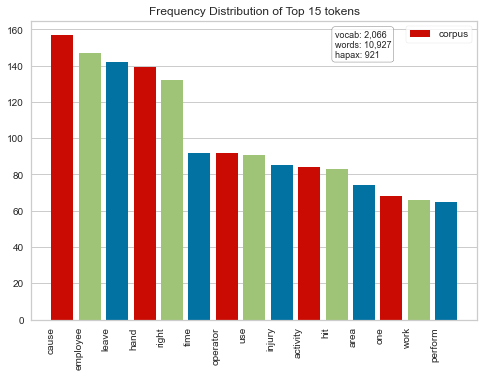

In [29]:
show_text_freq(texts_in_severity_low)

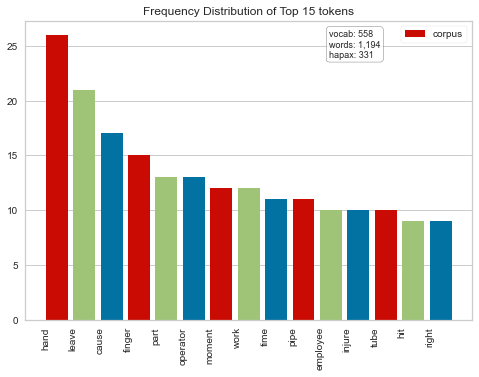

In [30]:
show_text_freq(texts_in_severity_moderate)

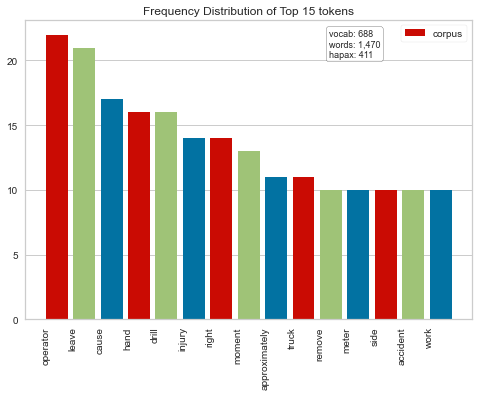

In [31]:
show_text_freq(texts_in_severity_high)

In [32]:
show_text_freq(texts_in_severity_critical)

Empty data-set


In [39]:
industrial_safety_df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Accident Severity,Updated Description,Updated Description Stems,Updated Description Lemmas
0,01-01-2016 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,low,remove drill rod jumbo maintenance supervisor ...,"[remov, drill, rod, jumbo, mainten, supervisor...","[remove, drill, rod, jumbo, maintenance, super..."
1,02-01-2016 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,low,activation sodium sulphide pump pip uncouple s...,"[activ, sodium, sulphid, pump, pipe, uncoupl, ...","[activation, sodium, sulphide, pump, pip, unco..."
2,06-01-2016 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,low,sub station milpo locate level collaborator ex...,"[sub, station, milpo, locat, level, collabor, ...","[sub, station, milpo, locate, level, collabora..."
3,08-01-2016 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,low,approximately personnel begin task unlock soqu...,"[approxim, nv, cx, ob, personnel, begin, task,...","[approximately, personnel, begin, task, unlock..."
4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,high,approximately circumstances mechanics anthony ...,"[approxim, circumst, mechan, anthoni, group, l...","[approximately, circumstances, mechanics, anth..."


> ## Data Encoding

> - ### Bag of Words

In [ ]:
#creating the document or corpus
corpus_accident_description = industrial_safety_df['Description'].values
#corpus_accident_description

In [ ]:
vec_bow = CountVectorizer()
X = vec.fit_transform(corpus_accident_description)
features = vec_bow.get_feature_names()
#print(features)
print(X.toarray())

> - ### TF-IDF Encoding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfidf = TfidfVectorizer()
X = vec_tfidf.fit_transform(corpus_accident_description)
features = vec_tfidf.get_feature_names()
#print(features)
print(X.toarray())

 - ### Random Forest Classifier

In [41]:
features = industrial_safety_df.drop(['Date','Countries','Local','Updated Description Stems','Updated Description Lemmas','Potential Accident Level'], axis=1)
target = industrial_safety_df['Potential Accident Level']